<a href="https://colab.research.google.com/github/devendrapandey2005/projects-/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
col_transformer_data = pd.read_csv('/content/col transformer data.csv')

In [ ]:
encoding_data = pd.read_csv('/content/data_for_encoding.csv')

In [ ]:
ohe_data = pd.read_csv('/content/data_for_ohe.csv')

In [ ]:
col_transformer_data.head()

,Years_of_Experience,Department,Job_Role,Performance_Rating,Seniority_Level,Promoted
0,7,IT,Data Scientist,Excellent,Mid,Yes
1,5,HR,Recruiter,Average,Mid,No
2,14,Marketing,SEO Specialist,Excellent,Senior,Yes
3,2,HR,Recruiter,Average,Junior,No
4,10,Marketing,Marketing Analyst,Excellent,Senior,Yes


In [ ]:
encoding_data.head()

,income level,satisfaction rating,purchased
0,less than 50K,neutral,no
1,50K-100K,like,yes
2,over 100K,extremely dislike,no
3,less than 50K,like,yes
4,50K-100K,extremely like,yes


In [ ]:
ohe_data.head()

,gender,race/ethnicity,lunch,math score,reading score
0,female,group B,standard,72,72
1,female,group C,standard,69,90
2,female,group B,standard,90,95
3,male,group A,free/reduced,47,57
4,male,group C,standard,76,78


In [ ]:
ohe_data.sample(10)

,gender,race/ethnicity,lunch,math score,reading score
973,female,group D,free/reduced,49,65
285,male,group B,standard,81,82
372,male,group D,standard,74,74
945,female,group C,standard,54,61
1,female,group C,standard,69,90
845,male,group E,standard,90,85
328,male,group C,standard,82,75
570,male,group B,standard,71,75
12,female,group B,standard,65,81
390,male,group E,free/reduced,73,67


In [ ]:
col_transformer_data.sample(10)

,Years_of_Experience,Department,Job_Role,Performance_Rating,Seniority_Level,Promoted
129,20,Finance,Accountant,Excellent,Senior,Yes
100,5,IT,Developer,Good,Mid,No
91,20,HR,Recruiter,Excellent,Senior,Yes
8,10,IT,System Analyst,Good,Senior,Yes
89,15,HR,HR Manager,Good,Senior,Yes
121,0,Sales,Sales Executive,Poor,Junior,No
69,5,HR,Recruiter,Average,Mid,No
21,6,HR,Recruiter,Excellent,Mid,Yes
43,0,Marketing,Marketing Analyst,Poor,Junior,No
88,18,Finance,Financial Analyst,Excellent,Senior,Yes


In [ ]:
encoding_data.sample(10)

,income level,satisfaction rating,purchased
11,over 100K,extremely like,no
122,over 100K,like,no
90,less than 50K,extremely like,no
133,50K-100K,extremely dislike,yes
126,less than 50K,like,no
39,less than 50K,neutral,no
17,over 100K,neutral,no
177,less than 50K,dislike,no
163,50K-100K,neutral,yes
44,over 100K,extremely dislike,yes


In [ ]:
ohe_data.head()

,gender,race/ethnicity,lunch,math score,reading score
0,female,group B,standard,72,72
1,female,group C,standard,69,90
2,female,group B,standard,90,95
3,male,group A,free/reduced,47,57
4,male,group C,standard,76,78


In [ ]:
print(ohe_data['gender'].unique())
print(ohe_data['race/ethnicity'].unique())
print(ohe_data['lunch'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
['standard' 'free/reduced']


#ONE HOT ENCODING USING PANDAS

In [ ]:
import numpy as np
temp = pd.get_dummies(ohe_data, columns=['lunch','race/ethnicity','gender'],dtype = np.int32)

In [ ]:
temp.sample(4)

,math score,reading score,lunch_free/reduced,lunch_standard,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male
500,74,79,0,1,0,0,0,1,0,1,0
452,65,77,1,0,0,0,1,0,0,1,0
129,51,49,0,1,1,0,0,0,0,1,0
846,91,85,0,1,0,0,1,0,0,0,1


In [ ]:
temp.shape

(1000, 11)

In [ ]:
new_temp = pd.get_dummies(ohe_data, columns=['lunch','race/ethnicity','gender'],dtype = np.int32,drop_first= True)

In [ ]:
new_temp.sample(2)

,math score,reading score,lunch_standard,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_male
763,62,62,1,1,0,0,0,0
264,76,73,1,0,0,1,0,1


In [ ]:
new_temp.shape

(1000, 8)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
x = ohe_data.iloc[:,0:4]
y = ohe_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state= 2)#test_size=0.2, yeh 80% data training ko de rha hai aur 20% testing ko aur ,random_state= 2 yeh har baar same output show kr rha hai deployment ke time hum isko ignore krdete hai


In [ ]:
x_test.sample(2)

,gender,race/ethnicity,lunch,math score
931,male,group D,free/reduced,62
65,male,group B,standard,67


In [ ]:
x_train.sample(2)

,gender,race/ethnicity,lunch,math score
145,female,group C,free/reduced,22
76,male,group E,standard,30


In [ ]:
y_test.sample(2)

,reading score
363,34
451,92


In [ ]:
y_train.sample(2)

,reading score
571,96
52,44


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe_data = OneHotEncoder()

In [ ]:
ohe_data.fit(x_train[['gender','race/ethnicity','lunch']])

OneHotEncoder()

In [ ]:
new_x_train = ohe_data.transform(x_train[['gender','race/ethnicity','lunch']])
new_x_test = ohe_data.transform(x_test[['gender','race/ethnicity','lunch']])

In [ ]:
new_x_train #it will return space matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2400 stored elements and shape (800, 9)>

In [ ]:
new_x_test.toarray()# toarray() can be should to convert the data to a numpy array

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
ohe = OneHotEncoder(sparse_output= False ,dtype=np.int32,drop = 'first')
ohe_data.fit(x_train[['gender','race/ethnicity','lunch']])
new_x_train = ohe_data.transform(x_train[['gender','race/ethnicity','lunch']])
new_x_test = ohe_data.transform(x_test[['gender','race/ethnicity','lunch']])
new_x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 600 stored elements and shape (200, 9)>

In [ ]:
encoding_data.head(5)

,income level,satisfaction rating,purchased
0,less than 50K,neutral,no
1,50K-100K,like,yes
2,over 100K,extremely dislike,no
3,less than 50K,like,yes
4,50K-100K,extremely like,yes


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.model_selection import train_test_split
x = encoding_data.drop('purchased',axis = 1)
y = encoding_data['purchased']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
x_train.shape , x_test.shape

((141, 2), (61, 2))

In [ ]:
print(encoding_data['satisfaction rating'].unique())
print(encoding_data['income level'].unique())

['neutral' 'like' 'extremely dislike' 'extremely like' 'dislike']
['less than 50K' '50K-100K' 'over 100K']


In [ ]:
x_train

,income level,satisfaction rating
110,over 100K,like
184,50K-100K,dislike
8,less than 50K,extremely like
155,over 100K,extremely dislike
27,less than 50K,like
...,...,...
168,less than 50K,neutral
145,50K-100K,neutral
69,less than 50K,dislike
72,less than 50K,extremely like


In [ ]:
oe = OrdinalEncoder(categories=[['less than 50K','50K-100K','over 100K'],
                                ['extremely dislike','extremely like','dislike',
                                 'like','neutral']])
oe

OrdinalEncoder(categories=[['less than 50K', '50K-100K', 'over 100K'],
                           ['extremely dislike', 'extremely like', 'dislike',
                            'like', 'neutral']])

WHY WE NEED NLP(NEURAL LANGUAGE PROCESSING)
1. Introduction to Natural Language Processing (NLP)- CleverTapNatural Language Processing (NLP) is crucial because it enables computers to understand, interpret, and generate human language, bridging the communication gap between humans and machines.
2. real world application of NLP
1. search engines
2. contextual advertising
3. chatbots and conversational agents
4. spam filltering and smart replies

Common NLP tasks
1. sentiment analysis
2. text classification
3. text summarization
4. topic modeling
5. text generation
6. knowledge graphs and Q&A systems
7. information reterival

In [ ]:
import string
text = 'hello! world this is a #test 120@nlp is! amazing'
def clean_text(text):
  cleaned_text = ''.join([char.lower() for char in text if char not in string.punctuation])
  return cleaned_text
cleaned_text = clean_text(text)
print('original text',text)
print('cleaned text ', cleaned_text)

original text hello! world this is a #test 120@nlp is! amazing
cleaned text  hello world this is a test 120nlp is amazing


Tokenization in NLP


In [ ]:
!pip install nltk

In [ ]:
#text spliting ke NLTK use krte hai
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

removal of stop words in NLP

In [ ]:
import numpy as np
import pandas as pd

credit = pd.read_csv('/content/tmdb_5000_credits.csv')

In [ ]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credit.sample(5)

,movie_id,title,cast,crew
1137,54054,One for the Money,"[{""cast_id"": 3, ""character"": ""Stephanie Plum"",...","[{""credit_id"": ""52fe4888c3a36847f816c713"", ""de..."
1883,11543,Kingpin,"[{""cast_id"": 13, ""character"": ""Roy Munson"", ""c...","[{""credit_id"": ""52fe44569251416c75031251"", ""de..."
3407,13649,High School Musical 2,"[{""cast_id"": 5, ""character"": ""Troy Bolton"", ""c...","[{""credit_id"": ""52fe45879251416c75059a45"", ""de..."
3446,1777,Fahrenheit 9/11,"[{""cast_id"": 25, ""character"": ""Himself (archiv...","[{""credit_id"": ""52fe4314c3a36847f8038b1f"", ""de..."
849,3580,Changeling,"[{""cast_id"": 6, ""character"": ""Christine Collin...","[{""credit_id"": ""52fe439ec3a36847f8062297"", ""de..."


In [ ]:
credit.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [ ]:
credit.isnull().sum()

,0
movie_id,0
title,0
cast,0
crew,0


In [ ]:
credit.duplicated().sum()

np.int64(0)

In [ ]:
credit[credit.duplicated()]

,movie_id,title,cast,crew


In [ ]:
credit['movie_id'].describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


<Axes: xlabel='movie_id', ylabel='Count'>

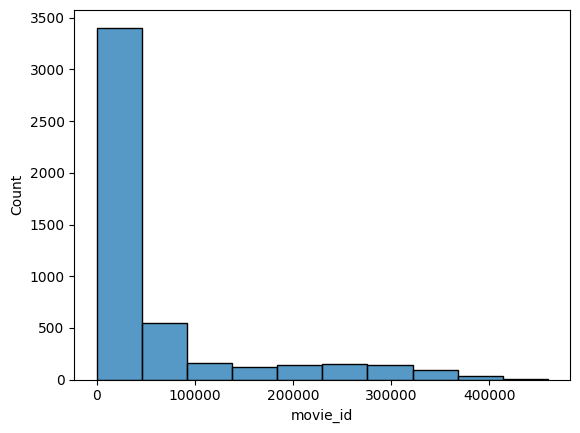

In [ ]:
sns.histplot(credit['movie_id'],bins=10)

<Axes: ylabel='movie_id'>

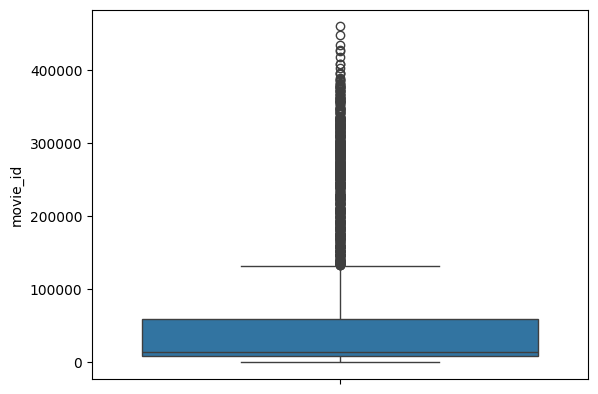

In [ ]:
sns.boxplot(credit['movie_id'])

<Axes: xlabel='movie_id', ylabel='Density'>

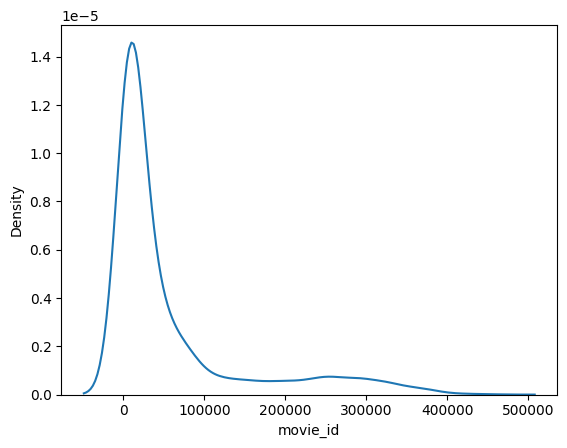

In [ ]:
sns.kdeplot(credit['movie_id'])

In [ ]:
movie = pd.read_csv('/content/tmdb_5000_movies.csv')
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies = movie.merge(credit,on = 'title')

In [ ]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [ ]:
movies['original_language'].value_counts()

,count
original_language,
en,4510
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
ko,12


In [ ]:
movies = movies[['genres','id','keywords','title','overview','cast','crew']]
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [ ]:
movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [ ]:
x = [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}]
op = " "
for i in x:
  op+=i['name']
print(op)

 culture clashfuturespace war


In [ ]:
import ast

In [ ]:
def convert(obj):
  l = []
  for i in ast.literal_eval(obj):
    l.append(i['name'])
  return l
x =convert('[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}]')
print(x)

['culture clash', 'future', 'space war']


In [ ]:
movies.iloc[0]['cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [ ]:
def convert(obj):
  l = []
  for i in ast.literal_eval(obj):
    l.append(i['name'])
  return l
x =convert('[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}]')
print(x)

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']


In [ ]:
movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [ ]:
def convert1(obj):
  l =[]
  for i in ast.literal_eval(obj):
    if i['job'] == 'Director':
      l.append(i['name'])
  return l
x = convert1('''[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"}, {"credit_id": "52fe48009251416c750ac9d9", "department": "Writing", "gender": 2, "id": 2710, "job": "Writer", "name": "James Cameron"}, {"credit_id": "52fe48009251416c750aca17", "department": "Editing", "gender": 2, "id": 2710, "job": "Editor", "name": "James Cameron"}, {"credit_id": "52fe48009251416c750aca29", "department": "Production", "gender": 2, "id": 2710, "job": "Producer", "name": "James Cameron"}, {"credit_id": "52fe48009251416c750aca3f", "department": "Writing", "gender": 2, "id": 2710, "job": "Screenplay", "name": "James Cameron"}, {"credit_id": "539c4987c3a36810ba0021a4", "department": "Art", "gender": 2, "id": 7236, "job": "Art Direction", "name": "Andrew Menzies"}, {"credit_id": "549598c3c3a3686ae9004383", "department": "Visual Effects", "gender": 0, "id": 6690, "job": "Visual Effects Producer", "name": "Jill Brooks"}, {"credit_id": "52fe48009251416c750aca4b", "department": "Production", "gender": 1, "id": 6347, "job": "Casting", "name": "Margery Simkin"}, {"credit_id": "570b6f419251417da70032fe", "department": "Art", "gender": 2, "id": 6878, "job": "Supervising Art Director", "name": "Kevin Ishioka"}, {"credit_id": "5495a0fac3a3686ae9004468", "department": "Sound", "gender": 0, "id": 6883, "job": "Music Editor", "name": "Dick Bernstein"}, {"credit_id": "54959706c3a3686af3003e81", "department": "Sound", "gender": 0, "id": 8159, "job": "Sound Effects Editor", "name": "Shannon Mills"}, {"credit_id": "54491d58c3a3680fb1001ccb", "department": "Sound", "gender": 0, "id": 8160, "job": "Foley", "name": "Dennie Thorpe"}, {"credit_id": "54491d6cc3a3680fa5001b2c", "department": "Sound", "gender": 0, "id": 8163, "job": "Foley", "name": "Jana Vance"}, {"credit_id": "52fe48009251416c750aca57", "department": "Costume & Make-Up", "gender": 1, "id": 8527, "job": "Costume Design", "name": "Deborah Lynn Scott"}, {"credit_id": "52fe48009251416c750aca2f", "department": "Production", "gender": 2, "id": 8529, "job": "Producer", "name": "Jon Landau"}, {"credit_id": "539c4937c3a36810ba002194", "department": "Art", "gender": 0, "id": 9618, "job": "Art Direction", "name": "Sean Haworth"}, {"credit_id": "539c49b6c3a36810c10020e6", "department": "Art", "gender": 1, "id": 12653, "job": "Set Decoration", "name": "Kim Sinclair"}, {"credit_id": "570b6f2f9251413a0e00020d", "department": "Art", "gender": 1, "id": 12653, "job": "Supervising Art Director", "name": "Kim Sinclair"}, {"credit_id": "54491a6c0e0a26748c001b19", "department": "Art", "gender": 2, "id": 14350, "job": "Set Designer", "name": "Richard F. Mays"}, {"credit_id": "56928cf4c3a3684cff0025c4", "department": "Production", "gender": 1, "id": 20294, "job": "Executive Producer", "name": "Laeta Kalogridis"}, {"credit_id": "52fe48009251416c750aca51", "department": "Costume & Make-Up", "gender": 0, "id": 17675, "job": "Costume Design", "name": "Mayes C. Rubeo"}, {"credit_id": "52fe48009251416c750aca11", "department": "Camera", "gender": 2, "id": 18265, "job": "Director of Photography", "name": "Mauro Fiore"}, {"credit_id": "5449194d0e0a26748f001b39", "department": "Art", "gender": 0, "id": 42281, "job": "Set Designer", "name": "Scott Herbertson"}, {"credit_id": "52fe48009251416c750aca05", "department": "Crew", "gender": 0, "id": 42288, "job": "Stunts", "name": "Woody Schultz"}, {"credit_id": "5592aefb92514152de0010f5", "department": "Costume & Make-Up", "gender": 0, "id": 29067, "job": "Makeup Artist", "name": "Linda DeVetta"}, {"credit_id": "5592afa492514152de00112c", "department": "Costume & Make-Up", "gender": 0, "id": 29067, "job": "Hairstylist", "name": "Linda DeVetta"}, {"credit_id": "54959ed592514130fc002e5d", "department": "Camera", "gender": 2, "id": 33302, "job": "Camera Operator", "name": "Richard Bluck"}, {"credit_id": "539c4891c3a36810ba002147", "department": "Art", "gender": 2, "id": 33303, "job": "Art Direction", "name": "Simon Bright"}, {"credit_id": "54959c069251417a81001f3a", "department": "Visual Effects", "gender": 0, "id": 113145, "job": "Visual Effects Supervisor", "name": "Richard Martin"}, {"credit_id": "54959a0dc3a3680ff5002c8d", "department": "Crew", "gender": 2, "id": 58188, "job": "Visual Effects Editor", "name": "Steve R. Moore"}, {"credit_id": "52fe48009251416c750aca1d", "department": "Editing", "gender": 2, "id": 58871, "job": "Editor", "name": "John Refoua"}, {"credit_id": "54491a4dc3a3680fc30018ca", "department": "Art", "gender": 0, "id": 92359, "job": "Set Designer", "name": "Karl J. Martin"}, {"credit_id": "52fe48009251416c750aca35", "department": "Camera", "gender": 1, "id": 72201, "job": "Director of Photography", "name": "Chiling Lin"}, {"credit_id": "52fe48009251416c750ac9ff", "department": "Crew", "gender": 0, "id": 89714, "job": "Stunts", "name": "Ilram Choi"}, {"credit_id": "54959c529251416e2b004394", "department": "Visual Effects", "gender": 2, "id": 93214, "job": "Visual Effects Supervisor", "name": "Steven Quale"}, {"credit_id": "54491edf0e0a267489001c37", "department": "Crew", "gender": 1, "id": 122607, "job": "Dialect Coach", "name": "Carla Meyer"}, {"credit_id": "539c485bc3a368653d001a3a", "department": "Art", "gender": 2, "id": 132585, "job": "Art Direction", "name": "Nick Bassett"}, {"credit_id": "539c4903c3a368653d001a74", "department": "Art", "gender": 0, "id": 132596, "job": "Art Direction", "name": "Jill Cormack"}, {"credit_id": "539c4967c3a368653d001a94", "department": "Art", "gender": 0, "id": 132604, "job": "Art Direction", "name": "Andy McLaren"}, {"credit_id": "52fe48009251416c750aca45", "department": "Crew", "gender": 0, "id": 236696, "job": "Motion Capture Artist", "name": "Terry Notary"}, {"credit_id": "54959e02c3a3680fc60027d2", "department": "Crew", "gender": 2, "id": 956198, "job": "Stunt Coordinator", "name": "Garrett Warren"}, {"credit_id": "54959ca3c3a3686ae300438c", "department": "Visual Effects", "gender": 2, "id": 957874, "job": "Visual Effects Supervisor", "name": "Jonathan Rothbart"}, {"credit_id": "570b6f519251412c74001b2f", "department": "Art", "gender": 0, "id": 957889, "job": "Supervising Art Director", "name": "Stefan Dechant"}, {"credit_id": "570b6f62c3a3680b77007460", "department": "Art", "gender": 2, "id": 959555, "job": "Supervising Art Director", "name": "Todd Cherniawsky"}, {"credit_id": "539c4a3ac3a36810da0021cc", "department": "Production", "gender": 0, "id": 1016177, "job": "Casting", "name": "Miranda Rivers"}, {"credit_id": "539c482cc3a36810c1002062", "department": "Art", "gender": 0, "id": 1032536, "job": "Production Design", "name": "Robert Stromberg"}, {"credit_id": "539c4b65c3a36810c9002125", "department": "Costume & Make-Up", "gender": 2, "id": 1071680, "job": "Costume Design", "name": "John Harding"}, {"credit_id": "54959e6692514130fc002e4e", "department": "Camera", "gender": 0, "id": 1177364, "job": "Steadicam Operator", "name": "Roberto De Angelis"}, {"credit_id": "539c49f1c3a368653d001aac", "department": "Costume & Make-Up", "gender": 2, "id": 1202850, "job": "Makeup Department Head", "name": "Mike Smithson"}, {"credit_id": "5495999ec3a3686ae100460c", "department": "Visual Effects", "gender": 0, "id": 1204668, "job": "Visual Effects Producer", "name": "Alain Lalanne"}, {"credit_id": "54959cdfc3a3681153002729", "department": "Visual Effects", "gender": 0, "id": 1206410, "job": "Visual Effects Supervisor", "name": "Lucas Salton"}, {"credit_id": "549596239251417a81001eae", "department": "Crew", "gender": 0, "id": 1234266, "job": "Post Production Supervisor", "name": "Janace Tashjian"}, {"credit_id": "54959c859251416e1e003efe", "department": "Visual Effects", "gender": 0, "id": 1271932, "job": "Visual Effects Supervisor", "name": "Stephen Rosenbaum"}, {"credit_id": "5592af28c3a368775a00105f", "department": "Costume & Make-Up", "gender": 0, "id": 1310064, "job": "Makeup Artist", "name": "Frankie Karena"}, {"credit_id": "539c4adfc3a36810e300203b", "department": "Costume & Make-Up", "gender": 1, "id": 1319844, "job": "Costume Supervisor", "name": "Lisa Lovaas"}, {"credit_id": "54959b579251416e2b004371", "department": "Visual Effects", "gender": 0, "id": 1327028, "job": "Visual Effects Supervisor", "name": "Jonathan Fawkner"}, {"credit_id": "539c48a7c3a36810b5001fa7", "department": "Art", "gender": 0, "id": 1330561, "job": "Art Direction", "name": "Robert Bavin"}, {"credit_id": "539c4a71c3a36810da0021e0", "department": "Costume & Make-Up", "gender": 0, "id": 1330567, "job": "Costume Supervisor", "name": "Anthony Almaraz"}, {"credit_id": "539c4a8ac3a36810ba0021e4", "department": "Costume & Make-Up", "gender": 0, "id": 1330570, "job": "Costume Supervisor", "name": "Carolyn M. Fenton"}, {"credit_id": "539c4ab6c3a36810da0021f0", "department": "Costume & Make-Up", "gender": 0, "id": 1330574, "job": "Costume Supervisor", "name": "Beth Koenigsberg"}, {"credit_id": "54491ab70e0a267480001ba2", "department": "Art", "gender": 0, "id": 1336191, "job": "Set Designer", "name": "Sam Page"}, {"credit_id": "544919d9c3a3680fc30018bd", "department": "Art", "gender": 0, "id": 1339441, "job": "Set Designer", "name": "Tex Kadonaga"}, {"credit_id": "54491cf50e0a267483001b0c", "department": "Editing", "gender": 0, "id": 1352422, "job": "Dialogue Editor", "name": "Kim Foscato"}, {"credit_id": "544919f40e0a26748c001b09", "department": "Art", "gender": 0, "id": 1352962, "job": "Set Designer", "name": "Tammy S. Lee"}, {"credit_id": "5495a115c3a3680ff5002d71", "department": "Crew", "gender": 0, "id": 1357070, "job": "Transportation Coordinator", "name": "Denny Caira"}, {"credit_id": "5495a12f92514130fc002e94", "department": "Crew", "gender": 0, "id": 1357071, "job": "Transportation Coordinator", "name": "James Waitkus"}, {"credit_id": "5495976fc3a36811530026b0", "department": "Sound", "gender": 0, "id": 1360103, "job": "Supervising Sound Editor", "name": "Addison Teague"}, {"credit_id": "54491837c3a3680fb1001c5a", "department": "Art", "gender": 2, "id": 1376887, "job": "Set Designer", "name": "C. Scott Baker"}, {"credit_id": "54491878c3a3680fb4001c9d", "department": "Art", "gender": 0, "id": 1376888, "job": "Set Designer", "name": "Luke Caska"}, {"credit_id": "544918dac3a3680fa5001ae0", "department": "Art", "gender": 0, "id": 1376889, "job": "Set Designer", "name": "David Chow"}, {"credit_id": "544919110e0a267486001b68", "department": "Art", "gender": 0, "id": 1376890, "job": "Set Designer", "name": "Jonathan Dyer"}, {"credit_id": "54491967c3a3680faa001b5e", "department": "Art", "gender": 0, "id": 1376891, "job": "Set Designer", "name": "Joseph Hiura"}, {"credit_id": "54491997c3a3680fb1001c8a", "department": "Art", "gender": 0, "id": 1376892, "job": "Art Department Coordinator", "name": "Rebecca Jellie"}, {"credit_id": "544919ba0e0a26748f001b42", "department": "Art", "gender": 0, "id": 1376893, "job": "Set Designer", "name": "Robert Andrew Johnson"}, {"credit_id": "54491b1dc3a3680faa001b8c", "department": "Art", "gender": 0, "id": 1376895, "job": "Assistant Art Director", "name": "Mike Stassi"}, {"credit_id": "54491b79c3a3680fbb001826", "department": "Art", "gender": 0, "id": 1376897, "job": "Construction Coordinator", "name": "John Villarino"}, {"credit_id": "54491baec3a3680fb4001ce6", "department": "Art", "gender": 2, "id": 1376898, "job": "Assistant Art Director", "name": "Jeffrey Wisniewski"}, {"credit_id": "54491d2fc3a3680fb4001d07", "department": "Editing", "gender": 0, "id": 1376899, "job": "Dialogue Editor", "name": "Cheryl Nardi"}, {"credit_id": "54491d86c3a3680fa5001b2f", "department": "Editing", "gender": 0, "id": 1376901, "job": "Dialogue Editor", "name": "Marshall Winn"}, {"credit_id": "54491d9dc3a3680faa001bb0", "department": "Sound", "gender": 0, "id": 1376902, "job": "Supervising Sound Editor", "name": "Gwendolyn Yates Whittle"}, {"credit_id": "54491dc10e0a267486001bce", "department": "Sound", "gender": 0, "id": 1376903, "job": "Sound Re-Recording Mixer", "name": "William Stein"}, {"credit_id": "54491f500e0a26747c001c07", "department": "Crew", "gender": 0, "id": 1376909, "job": "Choreographer", "name": "Lula Washington"}, {"credit_id": "549599239251412c4e002a2e", "department": "Visual Effects", "gender": 0, "id": 1391692, "job": "Visual Effects Producer", "name": "Chris Del Conte"}, {"credit_id": "54959d54c3a36831b8001d9a", "department": "Visual Effects", "gender": 2, "id": 1391695, "job": "Visual Effects Supervisor", "name": "R. Christopher White"}, {"credit_id": "54959bdf9251412c4e002a66", "department": "Visual Effects", "gender": 0, "id": 1394070, "job": "Visual Effects Supervisor", "name": "Dan Lemmon"}, {"credit_id": "5495971d92514132ed002922", "department": "Sound", "gender": 0, "id": 1394129, "job": "Sound Effects Editor", "name": "Tim Nielsen"}, {"credit_id": "5592b25792514152cc0011aa", "department": "Crew", "gender": 0, "id": 1394286, "job": "CG Supervisor", "name": "Michael Mulholland"}, {"credit_id": "54959a329251416e2b004355", "department": "Crew", "gender": 0, "id": 1394750, "job": "Visual Effects Editor", "name": "Thomas Nittmann"}, {"credit_id": "54959d6dc3a3686ae9004401", "department": "Visual Effects", "gender": 0, "id": 1394755, "job": "Visual Effects Supervisor", "name": "Edson Williams"}, {"credit_id": "5495a08fc3a3686ae300441c", "department": "Editing", "gender": 0, "id": 1394953, "job": "Digital Intermediate", "name": "Christine Carr"}, {"credit_id": "55402d659251413d6d000249", "department": "Visual Effects", "gender": 0, "id": 1395269, "job": "Visual Effects Supervisor", "name": "John Bruno"}, {"credit_id": "54959e7b9251416e1e003f3e", "department": "Camera", "gender": 0, "id": 1398970, "job": "Steadicam Operator", "name": "David Emmerichs"}, {"credit_id": "54959734c3a3686ae10045e0", "department": "Sound", "gender": 0, "id": 1400906, "job": "Sound Effects Editor", "name": "Christopher Scarabosio"}, {"credit_id": "549595dd92514130fc002d79", "department": "Production", "gender": 0, "id": 1401784, "job": "Production Supervisor", "name": "Jennifer Teves"}, {"credit_id": "549596009251413af70028cc", "department": "Production", "gender": 0, "id": 1401785, "job": "Production Manager", "name": "Brigitte Yorke"}, {"credit_id": "549596e892514130fc002d99", "department": "Sound", "gender": 0, "id": 1401786, "job": "Sound Effects Editor", "name": "Ken Fischer"}, {"credit_id": "549598229251412c4e002a1c", "department": "Crew", "gender": 0, "id": 1401787, "job": "Special Effects Coordinator", "name": "Iain Hutton"}, {"credit_id": "549598349251416e2b00432b", "department": "Crew", "gender": 0, "id": 1401788, "job": "Special Effects Coordinator", "name": "Steve Ingram"}, {"credit_id": "54959905c3a3686ae3004324", "department": "Visual Effects", "gender": 0, "id": 1401789, "job": "Visual Effects Producer", "name": "Joyce Cox"}, {"credit_id": "5495994b92514132ed002951", "department": "Visual Effects", "gender": 0, "id": 1401790, "job": "Visual Effects Producer", "name": "Jenny Foster"}, {"credit_id": "549599cbc3a3686ae1004613", "department": "Crew", "gender": 0, "id": 1401791, "job": "Visual Effects Editor", "name": "Christopher Marino"}, {"credit_id": "549599f2c3a3686ae100461e", "department": "Crew", "gender": 0, "id": 1401792, "job": "Visual Effects Editor", "name": "Jim Milton"}, {"credit_id": "54959a51c3a3686af3003eb5", "department": "Visual Effects", "gender": 0, "id": 1401793, "job": "Visual Effects Producer", "name": "Cyndi Ochs"}, {"credit_id": "54959a7cc3a36811530026f4", "department": "Crew", "gender": 0, "id": 1401794, "job": "Visual Effects Editor", "name": "Lucas Putnam"}, {"credit_id": "54959b91c3a3680ff5002cb4", "department": "Visual Effects", "gender": 0, "id": 1401795, "job": "Visual Effects Supervisor", "name": "Anthony \'Max\' Ivins"}, {"credit_id": "54959bb69251412c4e002a5f", "department": "Visual Effects", "gender": 0, "id": 1401796, "job": "Visual Effects Supervisor", "name": "John Knoll"}, {"credit_id": "54959cbbc3a3686ae3004391", "department": "Visual Effects", "gender": 2, "id": 1401799, "job": "Visual Effects Supervisor", "name": "Eric Saindon"}, {"credit_id": "54959d06c3a3686ae90043f6", "department": "Visual Effects", "gender": 0, "id": 1401800, "job": "Visual Effects Supervisor", "name": "Wayne Stables"}, {"credit_id": "54959d259251416e1e003f11", "department": "Visual Effects", "gender": 0, "id": 1401801, "job": "Visual Effects Supervisor", "name": "David Stinnett"}, {"credit_id": "54959db49251413af7002975", "department": "Visual Effects", "gender": 0, "id": 1401803, "job": "Visual Effects Supervisor", "name": "Guy Williams"}, {"credit_id": "54959de4c3a3681153002750", "department": "Crew", "gender": 0, "id": 1401804, "job": "Stunt Coordinator", "name": "Stuart Thorp"}, {"credit_id": "54959ef2c3a3680fc60027f2", "department": "Lighting", "gender": 0, "id": 1401805, "job": "Best Boy Electric", "name": "Giles Coburn"}, {"credit_id": "54959f07c3a3680fc60027f9", "department": "Camera", "gender": 2, "id": 1401806, "job": "Still Photographer", "name": "Mark Fellman"}, {"credit_id": "54959f47c3a3681153002774", "department": "Lighting", "gender": 0, "id": 1401807, "job": "Lighting Technician", "name": "Scott Sprague"}, {"credit_id": "54959f8cc3a36831b8001df2", "department": "Visual Effects", "gender": 0, "id": 1401808, "job": "Animation Director", "name": "Jeremy Hollobon"}, {"credit_id": "54959fa0c3a36831b8001dfb", "department": "Visual Effects", "gender": 0, "id": 1401809, "job": "Animation Director", "name": "Orlando Meunier"}, {"credit_id": "54959fb6c3a3686af3003f54", "department": "Visual Effects", "gender": 0, "id": 1401810, "job": "Animation Director", "name": "Taisuke Tanimura"}, {"credit_id": "54959fd2c3a36831b8001e02", "department": "Costume & Make-Up", "gender": 0, "id": 1401812, "job": "Set Costumer", "name": "Lilia Mishel Acevedo"}, {"credit_id": "54959ff9c3a3686ae300440c", "department": "Costume & Make-Up", "gender": 0, "id": 1401814, "job": "Set Costumer", "name": "Alejandro M. Hernandez"}, {"credit_id": "5495a0ddc3a3686ae10046fe", "department": "Editing", "gender": 0, "id": 1401815, "job": "Digital Intermediate", "name": "Marvin Hall"}, {"credit_id": "5495a1f7c3a3686ae3004443", "department": "Production", "gender": 0, "id": 1401816, "job": "Publicist", "name": "Judy Alley"}, {"credit_id": "5592b29fc3a36869d100002f", "department": "Crew", "gender": 0, "id": 1418381, "job": "CG Supervisor", "name": "Mike Perry"}, {"credit_id": "5592b23a9251415df8001081", "department": "Crew", "gender": 0, "id": 1426854, "job": "CG Supervisor", "name": "Andrew Morley"}, {"credit_id": "55491e1192514104c40002d8", "department": "Art", "gender": 0, "id": 1438901, "job": "Conceptual Design", "name": "Seth Engstrom"}, {"credit_id": "5525d5809251417276002b06", "department": "Crew", "gender": 0, "id": 1447362, "job": "Visual Effects Art Director", "name": "Eric Oliver"}, {"credit_id": "554427ca925141586500312a", "department": "Visual Effects", "gender": 0, "id": 1447503, "job": "Modeling", "name": "Matsune Suzuki"}, {"credit_id": "551906889251415aab001c88", "department": "Art", "gender": 0, "id": 1447524, "job": "Art Department Manager", "name": "Paul Tobin"}, {"credit_id": "5592af8492514152cc0010de", "department": "Costume & Make-Up", "gender": 0, "id": 1452643, "job": "Hairstylist", "name": "Roxane Griffin"}, {"credit_id": "553d3c109251415852001318", "department": "Lighting", "gender": 0, "id": 1453938, "job": "Lighting Artist", "name": "Arun Ram-Mohan"}, {"credit_id": "5592af4692514152d5001355", "department": "Costume & Make-Up", "gender": 0, "id": 1457305, "job": "Makeup Artist", "name": "Georgia Lockhart-Adams"}, {"credit_id": "5592b2eac3a36877470012a5", "department": "Crew", "gender": 0, "id": 1466035, "job": "CG Supervisor", "name": "Thrain Shadbolt"}, {"credit_id": "5592b032c3a36877450015f1", "department": "Crew", "gender": 0, "id": 1483220, "job": "CG Supervisor", "name": "Brad Alexander"}, {"credit_id": "5592b05592514152d80012f6", "department": "Crew", "gender": 0, "id": 1483221, "job": "CG Supervisor", "name": "Shadi Almassizadeh"}, {"credit_id": "5592b090c3a36877570010b5", "department": "Crew", "gender": 0, "id": 1483222, "job": "CG Supervisor", "name": "Simon Clutterbuck"}, {"credit_id": "5592b0dbc3a368774b00112c", "department": "Crew", "gender": 0, "id": 1483223, "job": "CG Supervisor", "name": "Graeme Demmocks"}, {"credit_id": "5592b0fe92514152db0010c1", "department": "Crew", "gender": 0, "id": 1483224, "job": "CG Supervisor", "name": "Adrian Fernandes"}, {"credit_id": "5592b11f9251415df8001059", "department": "Crew", "gender": 0, "id": 1483225, "job": "CG Supervisor", "name": "Mitch Gates"}, {"credit_id": "5592b15dc3a3687745001645", "department": "Crew", "gender": 0, "id": 1483226, "job": "CG Supervisor", "name": "Jerry Kung"}, {"credit_id": "5592b18e925141645a0004ae", "department": "Crew", "gender": 0, "id": 1483227, "job": "CG Supervisor", "name": "Andy Lomas"}, {"credit_id": "5592b1bfc3a368775d0010e7", "department": "Crew", "gender": 0, "id": 1483228, "job": "CG Supervisor", "name": "Sebastian Marino"}, {"credit_id": "5592b2049251415df8001078", "department": "Crew", "gender": 0, "id": 1483229, "job": "CG Supervisor", "name": "Matthias Menz"}, {"credit_id": "5592b27b92514152d800136a", "department": "Crew", "gender": 0, "id": 1483230, "job": "CG Supervisor", "name": "Sergei Nevshupov"}, {"credit_id": "5592b2c3c3a36869e800003c", "department": "Crew", "gender": 0, "id": 1483231, "job": "CG Supervisor", "name": "Philippe Rebours"}, {"credit_id": "5592b317c3a36877470012af", "department": "Crew", "gender": 0, "id": 1483232, "job": "CG Supervisor", "name": "Michael Takarangi"}, {"credit_id": "5592b345c3a36877470012bb", "department": "Crew", "gender": 0, "id": 1483233, "job": "CG Supervisor", "name": "David Weitzberg"}, {"credit_id": "5592b37cc3a368775100113b", "department": "Crew", "gender": 0, "id": 1483234, "job": "CG Supervisor", "name": "Ben White"}, {"credit_id": "573c8e2f9251413f5d000094", "department": "Crew", "gender": 1, "id": 1621932, "job": "Stunts", "name": "Min Windle"}]''')
print(x)

['James Cameron']


In [ ]:
lst = ['new york','new delhi','news paper']
ls = [i.replace(" ","") for i in lst]
print(ls)

['newyork', 'newdelhi', 'newspaper']


In [ ]:
# The conversion of these columns should happen after merging and before creating the 'tags' column.
# The error occurs because the conversion was likely already applied in a previous execution.
# If you need to re-run this cell, make sure to reload the 'movies' dataframe first.
# movies['genres'] = movies['genres'].apply(convert)
# movies['keywords'] = movies['keywords'].apply(convert)
# movies['cast'] = movies['cast'].apply(convert)
# movies['crew'] = movies['crew'].apply(convert1)

In [ ]:
movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies['keywords'] = movies['keywords'].apply(convert)

In [ ]:
movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies['overview'] = movies['overview'].astype(str).fillna('').apply(lambda x:x.split())

In [ ]:
# Removing spaces between words
movies['genres'] = movies['genres'].apply(lambda x: [i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x: [i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x: [i.replace(" ","") for i in x])

In [ ]:
movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[[, {, "", i, d, "", :, , 2, 8, ,, , "", n, a, m,...",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[[, {, "", c, a, s, t, _, i, d, "", :, , 2, 4, 2...","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""..."
1,"[[, {, "", i, d, "", :, , 1, 2, ,, , "", n, a, m,...",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[[, {, "", c, a, s, t, _, i, d, "", :, , 4, ,, ,...","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""..."
2,"[[, {, "", i, d, "", :, , 2, 8, ,, , "", n, a, m,...",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[[, {, "", c, a, s, t, _, i, d, "", :, , 1, ,, ,...","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""..."
3,"[[, {, "", i, d, "", :, , 2, 8, ,, , "", n, a, m,...",49026,"[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[[, {, "", c, a, s, t, _, i, d, "", :, , 2, ,, ,...","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""..."
4,"[[, {, "", i, d, "", :, , 2, 8, ,, , "", n, a, m,...",49529,"[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[[, {, "", c, a, s, t, _, i, d, "", :, , 5, ,, ,...","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""..."


cooncatinating 'overview' , 'genres' ,'keywords' + 'cast' + 'crew' into a one column

In [ ]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] +movies['cast'] + movies['crew']

In [ ]:
new_df = movies[['id','title','tags']]

In [ ]:
new_df

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


#text to vector converstion (bag of word)
# tf - idf (term frequency , inverse document frequency)

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

/tmp/ipython-input-3089450492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [ ]:
def stem(text):
  y = []
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
new_df['tags'] = new_df['tags'].apply(stem)

/tmp/ipython-input-3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [ ]:
new_df

,id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...
4805,72766,Newlyweds,a newlyw couple' honeymoon is upend by the arr...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduc a dedic q..."
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [ ]:
vectors = cv.fit_transform(new_df['tags'])

5000 becasue data ka dimminsion hai alag alag 5000


In [ ]:
vectors.shape

(4809, 5000)

In [ ]:
vectors[0]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 27 stored elements and shape (1, 5000)>

now calculate the cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vectors)
print((similarity).shape)

(4809, 4809)


In [ ]:
new_df

,id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...
4805,72766,Newlyweds,a newlyw couple' honeymoon is upend by the arr...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduc a dedic q..."
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


In [ ]:
avatar_id = movies[movies['title'] == 'El Mariachi'].id.iloc[0]
print(avatar_id)

9367


In [ ]:
avatar_id = movies[movies['title'] == 'El Mariachi'].index[0]
print(avatar_id)

4804


In [ ]:
new_df.iloc[4587]['title']

'Gory Gory Hallelujah'

In [ ]:
movie_index = new_df[new_df['title'] == 'The Avengers'].index[0]
distances = similarity[movie_index]
print(distances)
movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])
# Get the top 5 similar movies (excluding the first one which is the movie itself)
for i in movies_list[1:6]:
  print(new_df.iloc[i[0]].title)

[0.         0.03350126 0.         ... 0.07537784 0.         0.        ]
X-Men: Apocalypse
Iron Man 3
Captain America: The First Avenger
Ant-Man
Fantastic 4: Rise of the Silver Surfer


In [ ]:
def recommend(movie):
    try:
        movie_index = new_df[new_df['title'] == movie].index[0]
        distances = similarity[movie_index]

        # Sort by similarity score (high to low)
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

        # Print recommended movie titles
        for i in movies_list:
            print(new_df.iloc[i[0]].title)

    except IndexError:
        print(movie, 'not found')


In [ ]:
recommend('Iron Man')

Iron Man not found
